# Importing Necessary Python Libraries

In [33]:
## pandas is used to read in the Titanic dataset as a CSV file.
import pandas as pd
import numpy as np
import seaborn as sns

## used to visualize and plot things
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Loading in the Titanic Dataset

To load in the titanic dataset, we are pulling the data from Github. To do this, we copied the link for the raw data from Github and used the pandas 'read_csv' function to read in the data. 

In [37]:
## loading in the Titanic dataset
titanic_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')

In [39]:
## viewing the first 10 entries in the Titanic dataset
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [41]:
## looking to see if there are any missing values in the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Clean-Up 

In this section of our code, we are cleaning-up the data to make it easier to interpret while also improving the accuracy of the Decision Tree. By dropping columns that will not be relevant for predicting the survivability of passengers on the Titanic, we are able to reduce the depth of the Decision Tree, which reduces overfitting. In machine learning, overfitting is an issue that occurs when a machine learning algorithm is able to fit/learn its training data really well, and fails to perform well on new, unseen data. Also in this data clean-up section, we will fill in any missing values for the Age column of the dataset with the mean age of the passengers. This step is useful because it allows us to use all instances in the dataset (meaning we have more data to work with when buidling our model). 

In [45]:
## Filling missing values for 'Age' column using the mean values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True);
titanic_data.head(10)

C:\Users\rachi\AppData\Local\Temp\ipykernel_29360\246698934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True);


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [47]:
## viewing the first 10 entries in the Titanic dataset
titanic_data['Sex'] = titanic_data['Sex'].map({'female': 0, 'male': 1})
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C


In [49]:
## dropping columns that will not be relevant for the tree
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
5,0,3,1,29.699118,0,0,8.4583
6,0,1,1,54.000000,0,0,51.8625
7,0,3,1,2.000000,3,1,21.0750
8,1,3,0,27.000000,0,2,11.1333
9,1,2,0,14.000000,1,0,30.0708


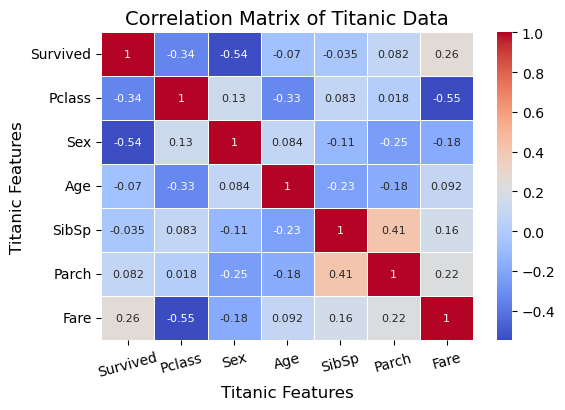

In [51]:
correlation_matrix = titanic_data.corr()

## plotting a heatmap 
plt.figure(figsize = (6,4))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', linewidths = 0.5, fmt = '.2g', annot = True, annot_kws = {"size": 8})
plt.title('Correlation Matrix of Titanic Data', fontsize = 14)
plt.xticks(rotation=15)
plt.xlabel('Titanic Features', fontsize = 12)
plt.ylabel('Titanic Features', fontsize = 12)
plt.show()

In the correlation matrix above, we are looking at features of the Titanic dataset in order to determine whether there is any sort of linear relationship (positive or negative) with passenger survivability. Looking above, the two variables that have the strongest negative relationship with 'Survived' are the passenger class ('Pclass'), and the passenger sex ('Sex'). The variable that has the strongest positive relationship with 'Survived' is the passenger fare ('Fare').

# Train-Test Split

In this section of our code, we are splitting the Titanic Data into a training dataset and a testing dataset. In machine learning, it is essential to split the data into a training and testing set so that the machine learning algorithm (in this case, our Decision Tree and Random Forest) can be evaluated on its performance on new, unseen data. When splitting the data, we are using the majority of the data, 75 percent, for training the model, and the remaining 25 percent for the test set. 

In [58]:
titanic_features = titanic_data.drop('Survived', axis = 1)
titanic_target = titanic_data['Survived']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(titanic_features, titanic_target, test_size = 0.25, random_state = 42)

# Decision Tree

In [66]:
decision_tree_titanic = DecisionTreeClassifier(random_state = 42)
decision_tree_titanic.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
# Predict and evaluate on validation set
y_pred_dt = decision_tree_titanic.predict(x_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7623318385650224
Confusion Matrix:
 [[112  22]
 [ 31  58]]


In [72]:
y_pred_dt = decision_tree_titanic.predict(x_train)
print('Decision Tree Accuracy:', accuracy_score(y_train, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_dt))

Decision Tree Accuracy: 0.9820359281437125
Confusion Matrix:
 [[414   1]
 [ 11 242]]


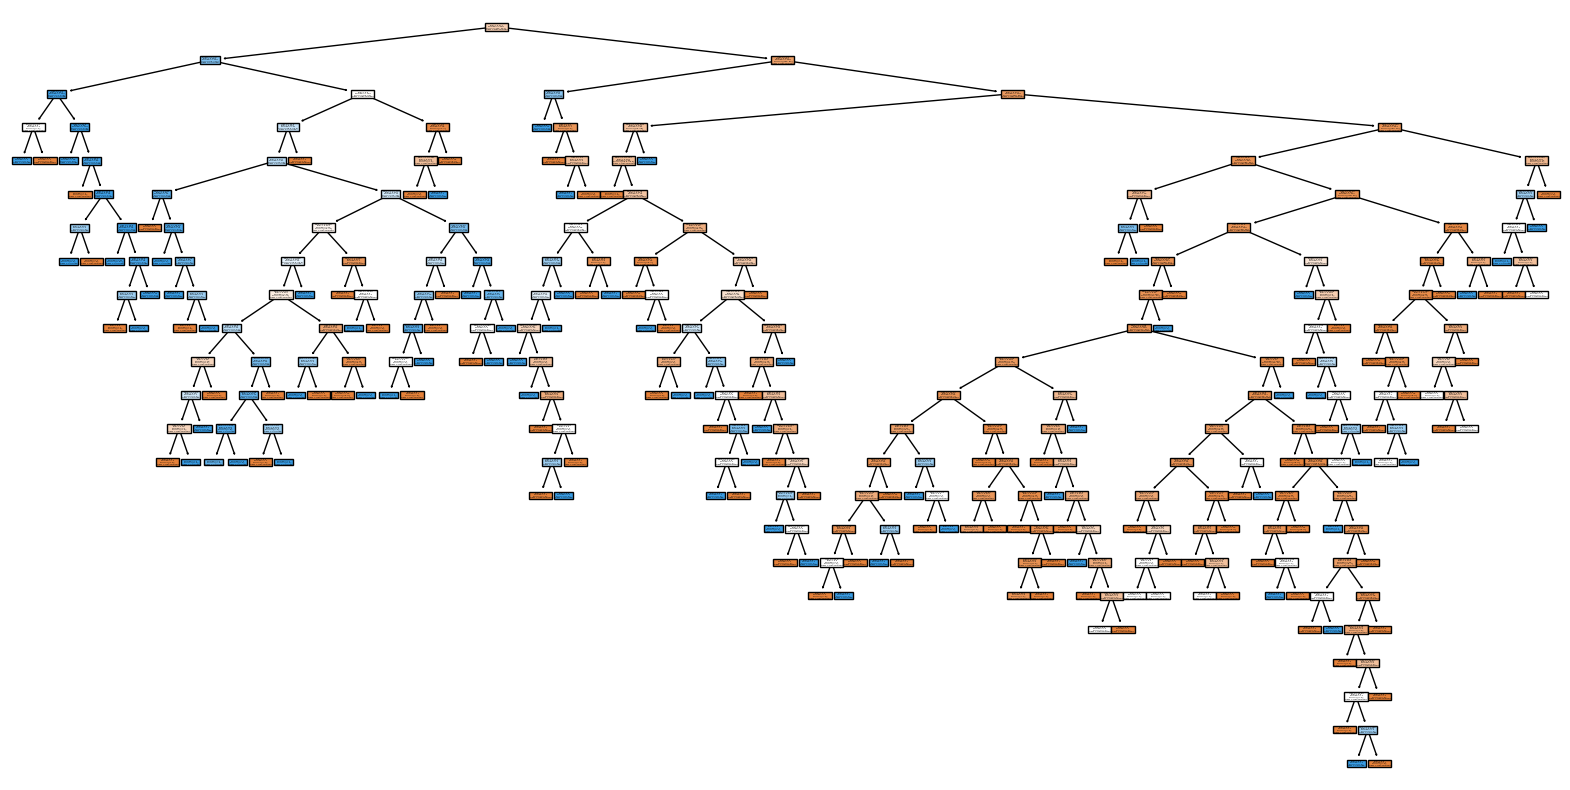

In [74]:
plt.figure(figsize=(20,10))  # Set the figure size for better visibility
plot_tree(decision_tree_titanic, feature_names=titanic_features.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [78]:
## looking at the max depth of the decision tree
decision_tree_titanic.get_depth()

22

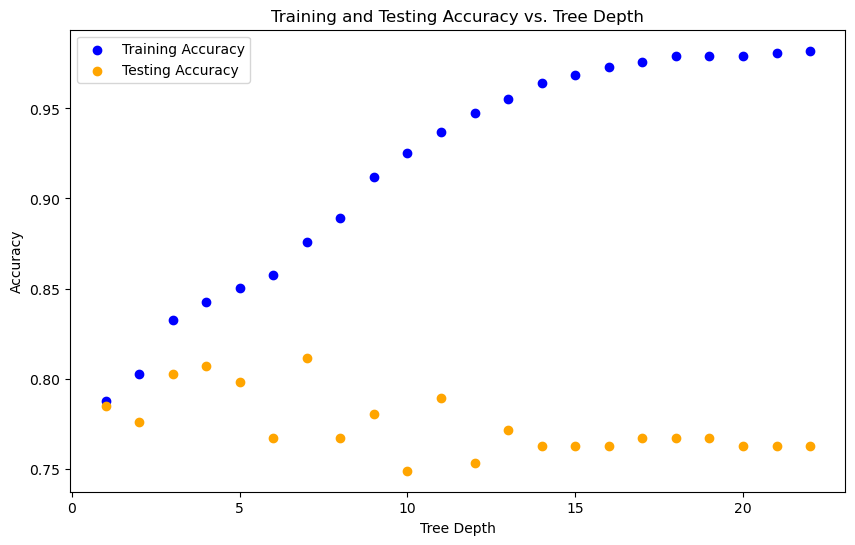

In [86]:
## trying to optimize the depth of the Decision Tree to increase the accuracy of the model on the test dataset
from sklearn.metrics import accuracy_score

# Test different depths and evaluate on the validation set
train_accuracies = []
test_accuracies = []

for depth in range(1, 23): #let_max depth range from 1 to 22 inclusive
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(x_train, y_train)
    
    # Evaluate on training and validation sets
    train_accuracies.append(accuracy_score(y_train, dt_model.predict(x_train)))
    test_accuracies.append(accuracy_score(y_test, dt_model.predict(x_test)))

depth = range(1,23)

# Plot training and validation accuracies
plt.figure(figsize=(10, 6))
plt.scatter(depth, train_accuracies, label = "Training Accuracy", color = "blue")
plt.scatter(depth, test_accuracies, label = "Testing Accuracy", color = "orange")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Testing Accuracy vs. Tree Depth")
plt.show()

Looking at the plot above, for the testing dataset, the maximum depth for the Decision Tree that produces the highest accuracy on the Titanic dataset is a tree with a depth of 7. Due to this, we will create a new tree with that depth. 

In [89]:
new_dt_titanic = DecisionTreeClassifier(random_state = 42, max_depth = 7)
new_dt_titanic.fit(x_train, y_train)
new_dt_titanic.score(x_test, y_test)

0.8116591928251121

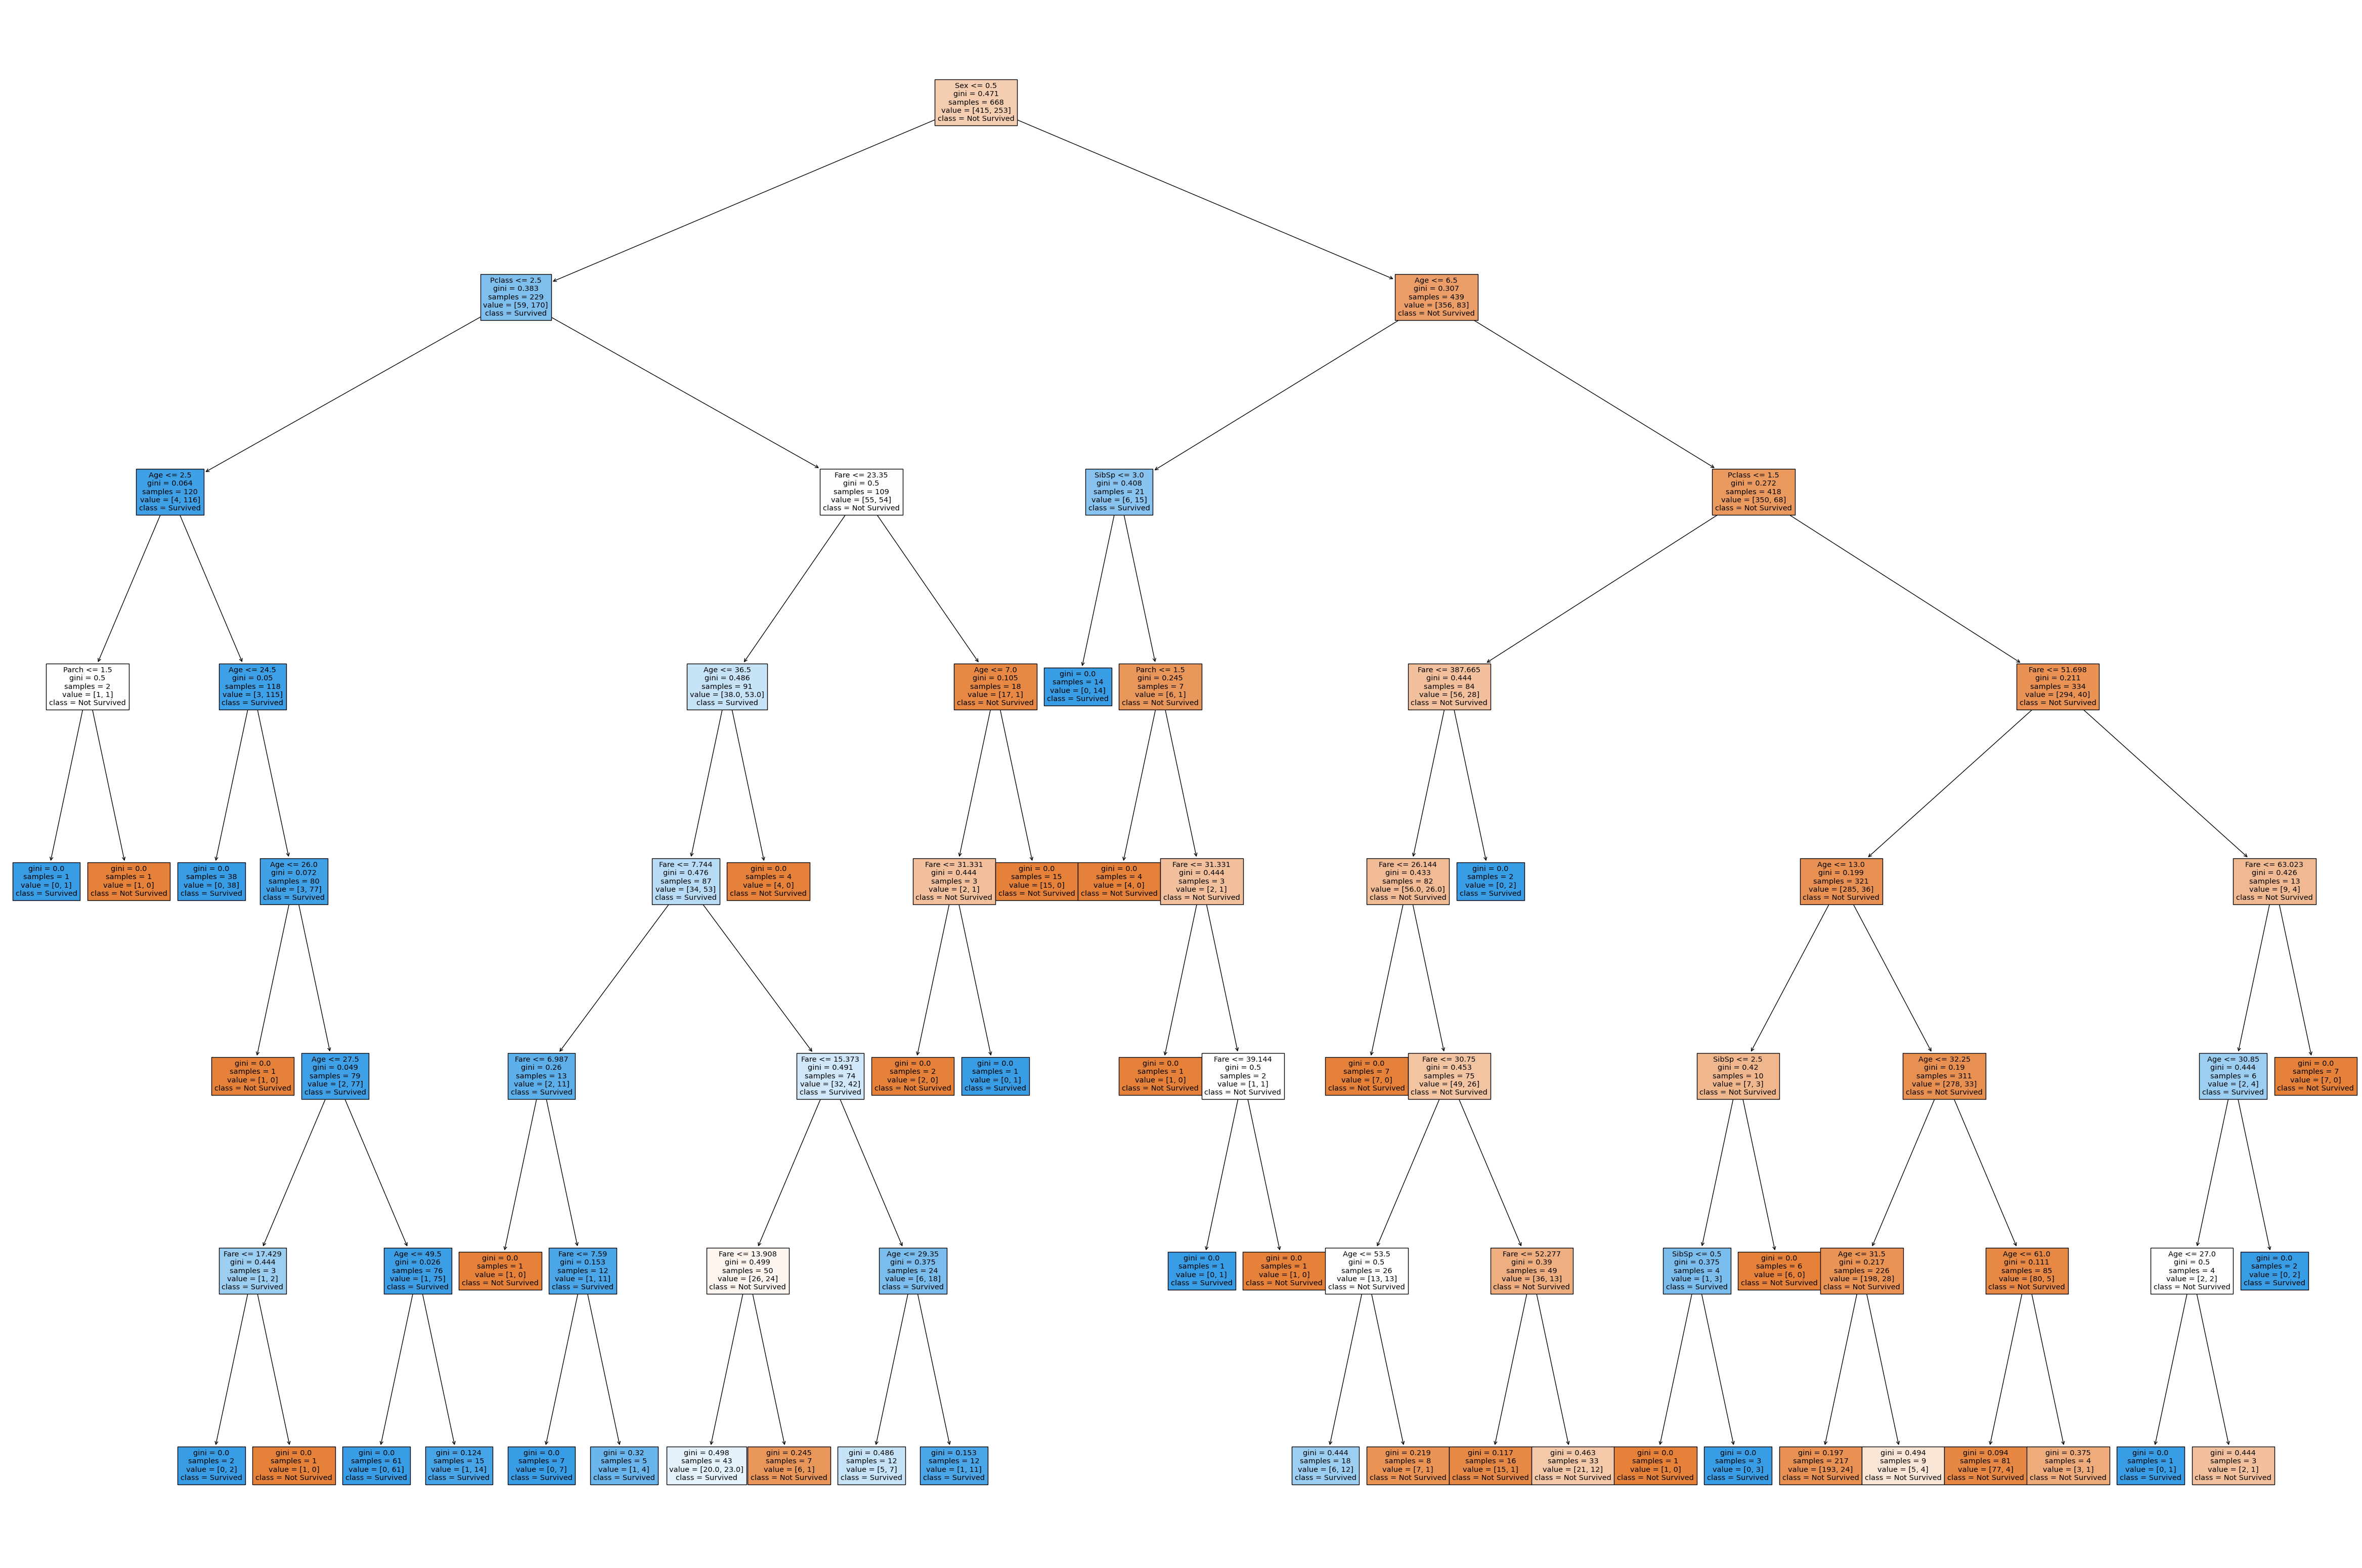

In [101]:
plt.figure(figsize = (60,40))  # Set the figure size for better visibility
plot_tree(new_dt_titanic, feature_names = titanic_features.columns, class_names = ['Not Survived', 'Survived'], filled = True)
plt.savefig('Decision Tree')
plt.show()

# Random Forest